### Problem Statement

This project understands how the student's performance (test scores) is affected by other variables such as gender, ethnicity, parental level of education, lunch and test preparation course.

### Data Collection

* Dataset source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
* The data consists of 8 columns and rows

### Importing data and required libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
### Reading data

def read_data(path):
    data = pd.read_csv(path)
    return data

df = read_data('./stud.csv')

### first 5 rows of dataset
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Analyzing data

In [3]:
def analyze_data(data):
    
    print("DataFrame Info:")
    print("=================================")
    display(data.info())
    print("\n")
    
    print("DataFrame Values:")
    print("=================================")
    display(data.head())
    print("\n")
    
    print("DataFrame Desscription")
    print("=================================")
    display(data.describe())
    print("\n")
    
    print("Number of null values")
    print("=================================")
    display(data.isnull().sum())
    print("\n")
    
    print("Number of duplicated values")
    print("==================================")
    display(data.duplicated().sum())
    print("\n")
    
    print("Number of unique values")
    print("==================================")
    display(data.nunique())
    print("\n")
    
    print("Dataframe Shape")
    print("===================================")
    print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")

analyze_data(df)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


None



DataFrame Values:


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75




DataFrame Desscription


,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000




Number of null values


gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64



Number of duplicated values


0



Number of unique values


gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64



Dataframe Shape
Rows: 1000, Columns: 8


### Dataset information

* total number of columns - 8
* total number of rows - 1000
* Number of null values in each column - 0
* Number of duplicated values - 0
* Number of categorical variables - 5
* Number of numerical variables - 3
* gender : Male/Female
* race/Ethnicity - Group A, B, C, D, E
* parental level of education - Bachelor's degee, some college, master's degree, associate's degree, high school)
* lunch - standard or free/reduced
* test preparation course - complete or not complete before test
* math score
* reading score
* writting score

### Data checks

* Check missing values - No missing values present in dataset
* Check duplicates - No duplicate values present in dataset
* Check data types - All data types are correct
* data statistics - Mean and standard deviation for all (math score, reading score and writting score) are close.
* min score for math - 0, min score for reading - 17, min score for writting - 10

In [4]:
### categorical and numerical variable

categorical_var = [col for col in df.columns if df[col].dtype == 'O']

numerical_var = [col for col in df.columns if df[col].dtype != 'O']

In [5]:
### unique values in categorical variable

for col in categorical_var:
    print(f'categories in {col} variable: ', end=" ")
    print(df[col].unique())

categories in gender variable:  ['female' 'male']
categories in race_ethnicity variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental_level_of_education variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch variable:  ['standard' 'free/reduced']
categories in test_preparation_course variable:  ['none' 'completed']


#### Creating new variables - Total score and average score

In [6]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score']/3

In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [8]:
for col in numerical_var:
    print(f'number of students with full marks in {col} is {df[df[col]==100]['average_score'].count()}')

number of students with full marks in math_score is 7
number of students with full marks in reading_score is 17
number of students with full marks in writing_score is 14


In [9]:
for col in numerical_var:
    print(f'number of students with less than 20 marks {col} is {df[df[col]<=20]['average_score'].count()}')

number of students with less than 20 marks math_score is 4
number of students with less than 20 marks reading_score is 1
number of students with less than 20 marks writing_score is 3


### Data visualization

#### Histogram and KDE

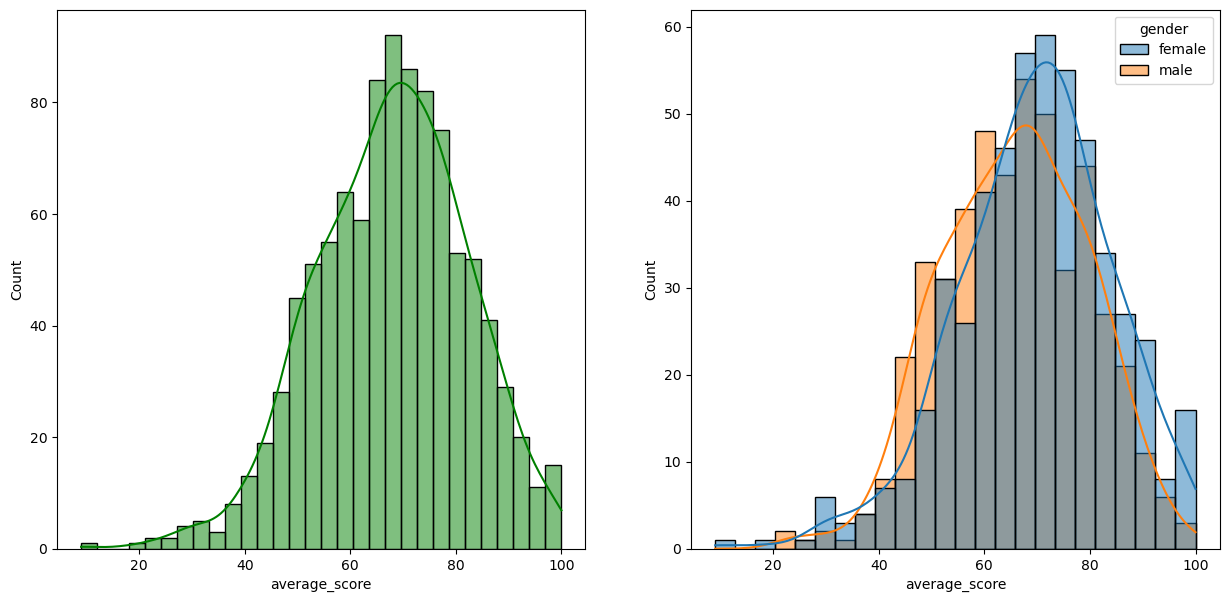

In [10]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

#### insights

* Average score for female students is higher than male

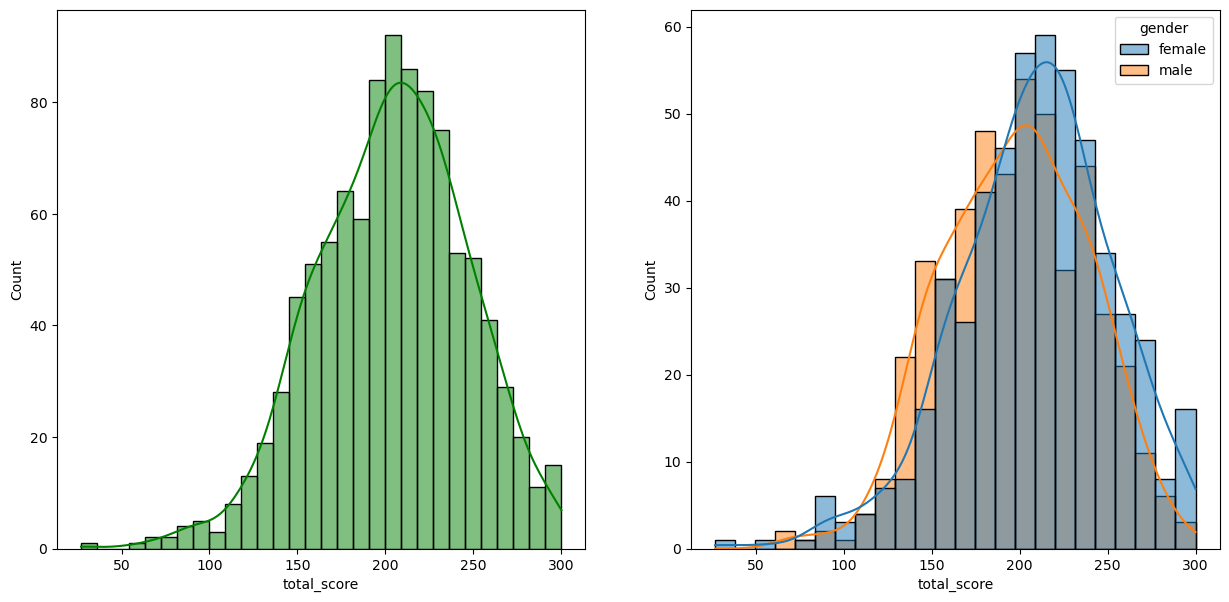

In [11]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

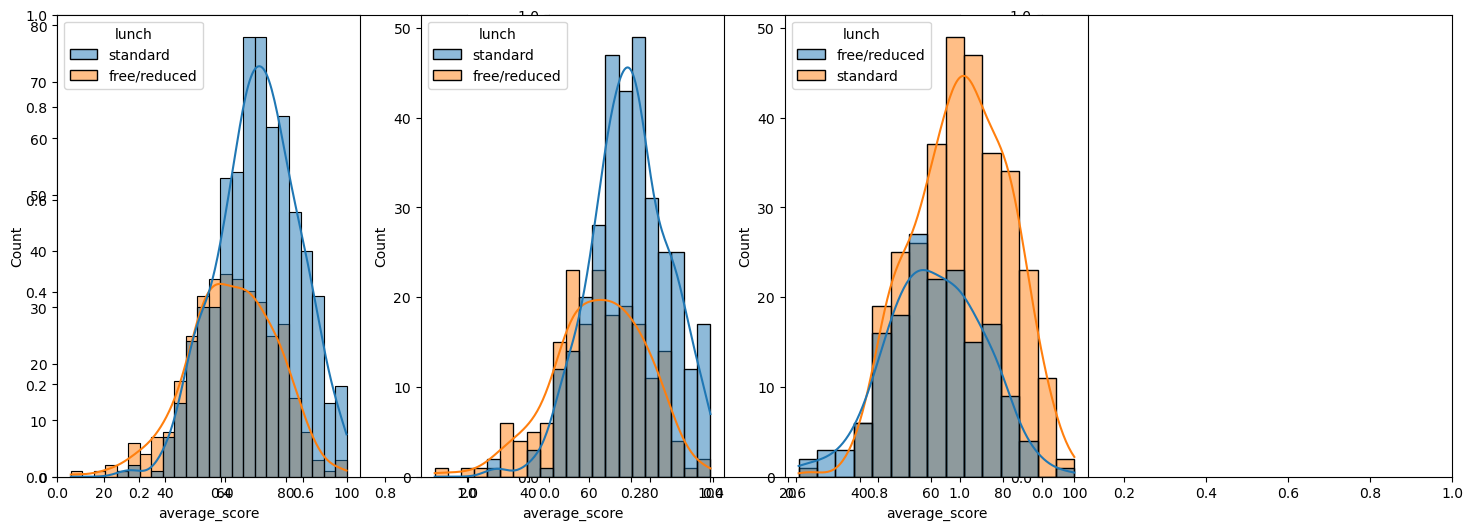

In [12]:
plt.subplots(1,3,figsize=(18,6))
plt.subplot(141)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.show()

#### insights
* standard lunch helps perform well in exams either it is female or male

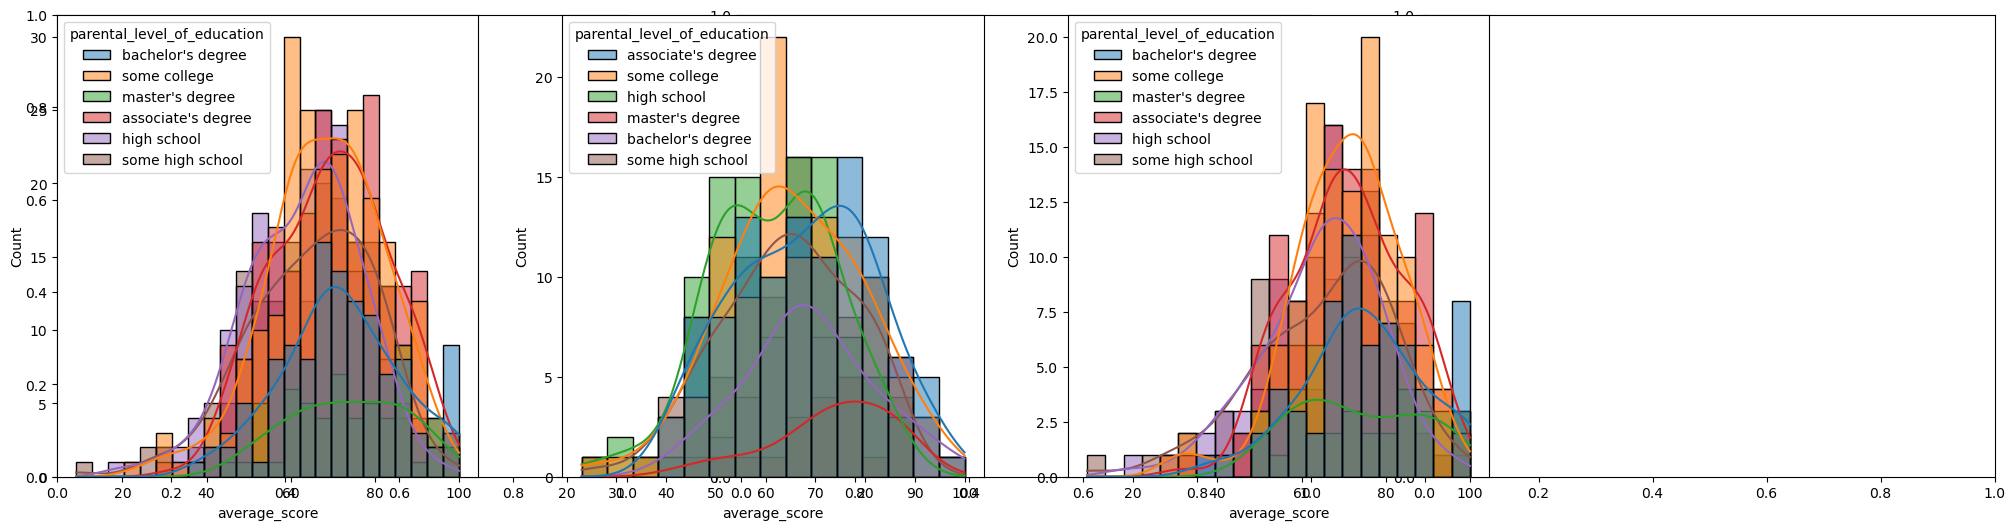

In [13]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()

#### insights
* in general, parent's education don't help students perform well in exam
* 2nd plot shows that parent's whose education is of associate's degree or master's degree - their male child tend to perform well in exam
* 3rd plot, we can see there is no affect of parent's education on female students

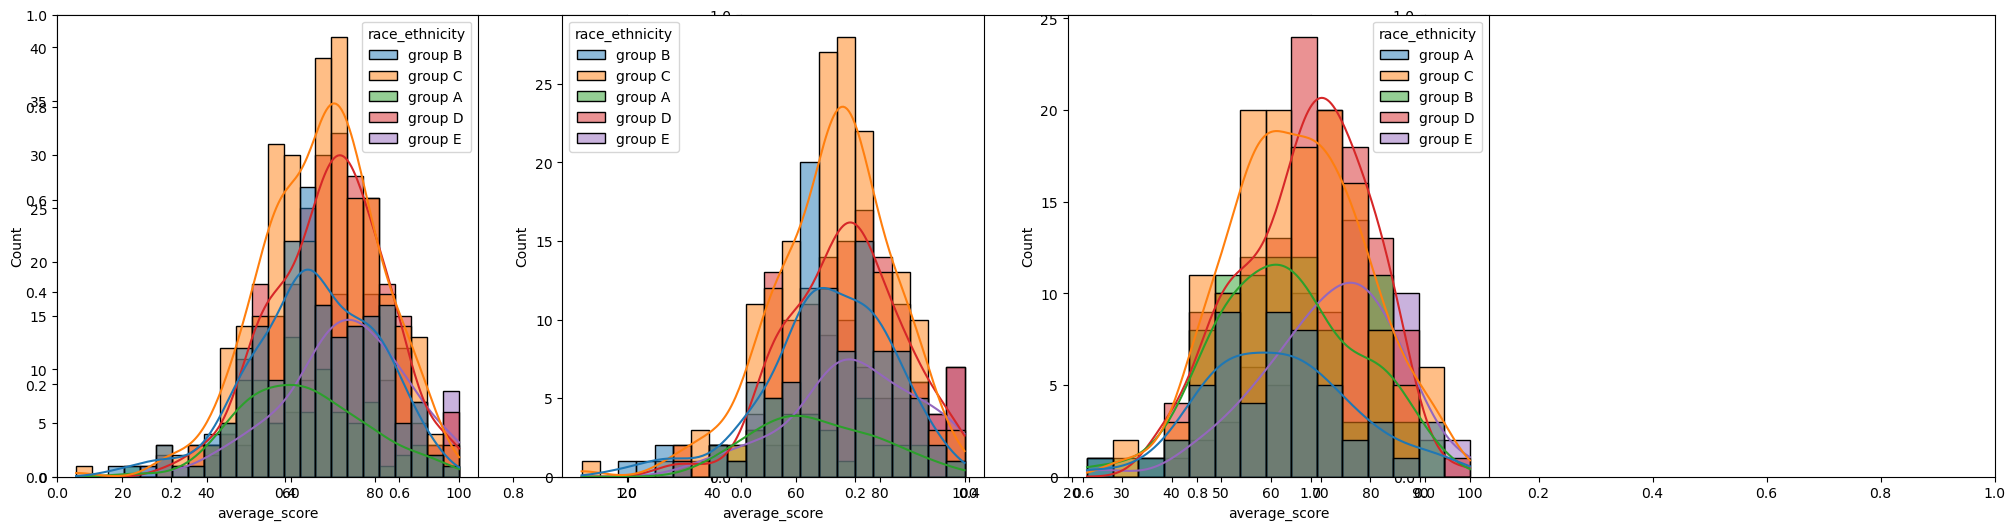

In [14]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.show()

#### insights

* Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or femaleale

#### Maximum  score of students in all three subjects

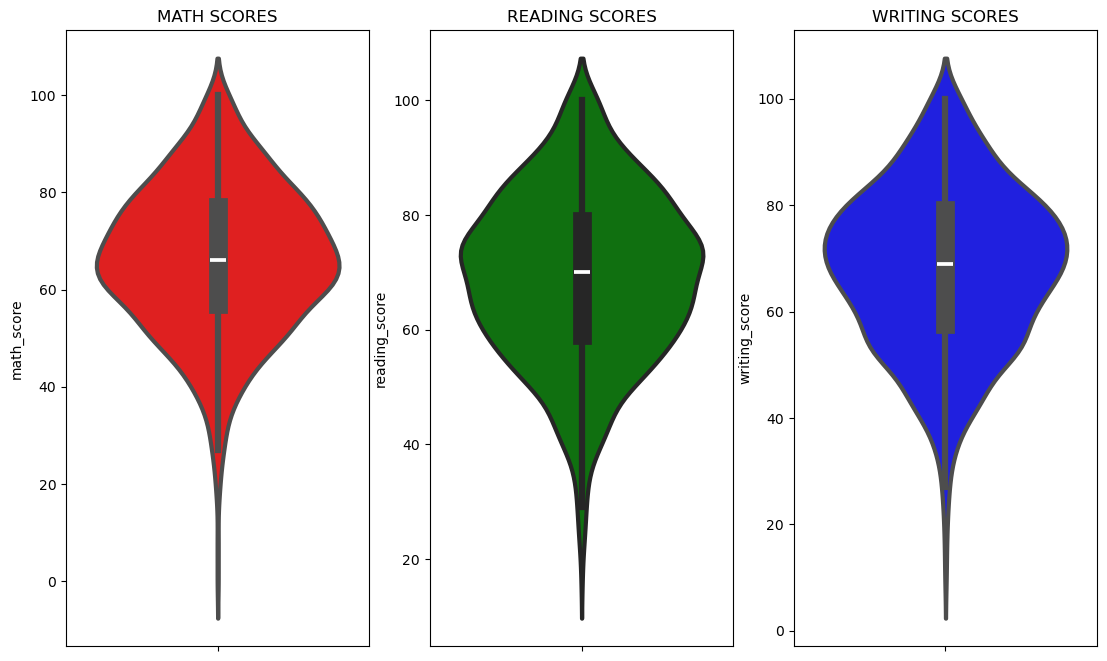

In [15]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

#### insights

* From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### Multivariate analysis using pie plot

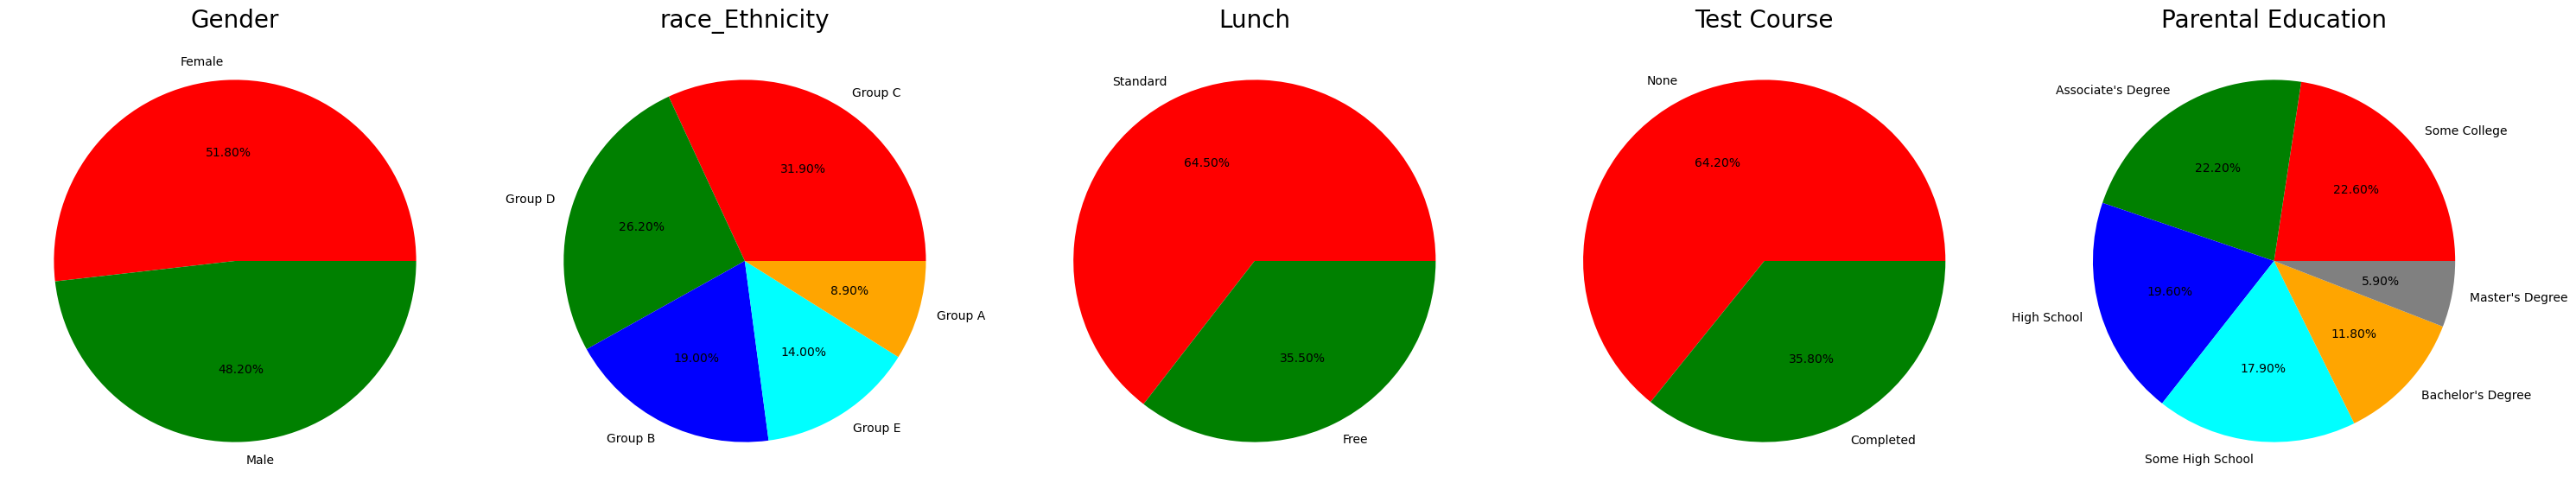

In [16]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels,autopct = '%1.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '%1.2f%%')
plt.title('race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%1.2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%1.2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '%1.2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

### Insights

 * Number of male and female students are almost equal
 * Max number of students are in group C
 * Number of students who have standar lunch are greater
 * Number of students who have not enrolled in any test preparation course is greater
 * Number of students whose parental education is "some college" is greater followed closely by "associate's degree"

### Feature wise Visualization

1. Distribution of gender

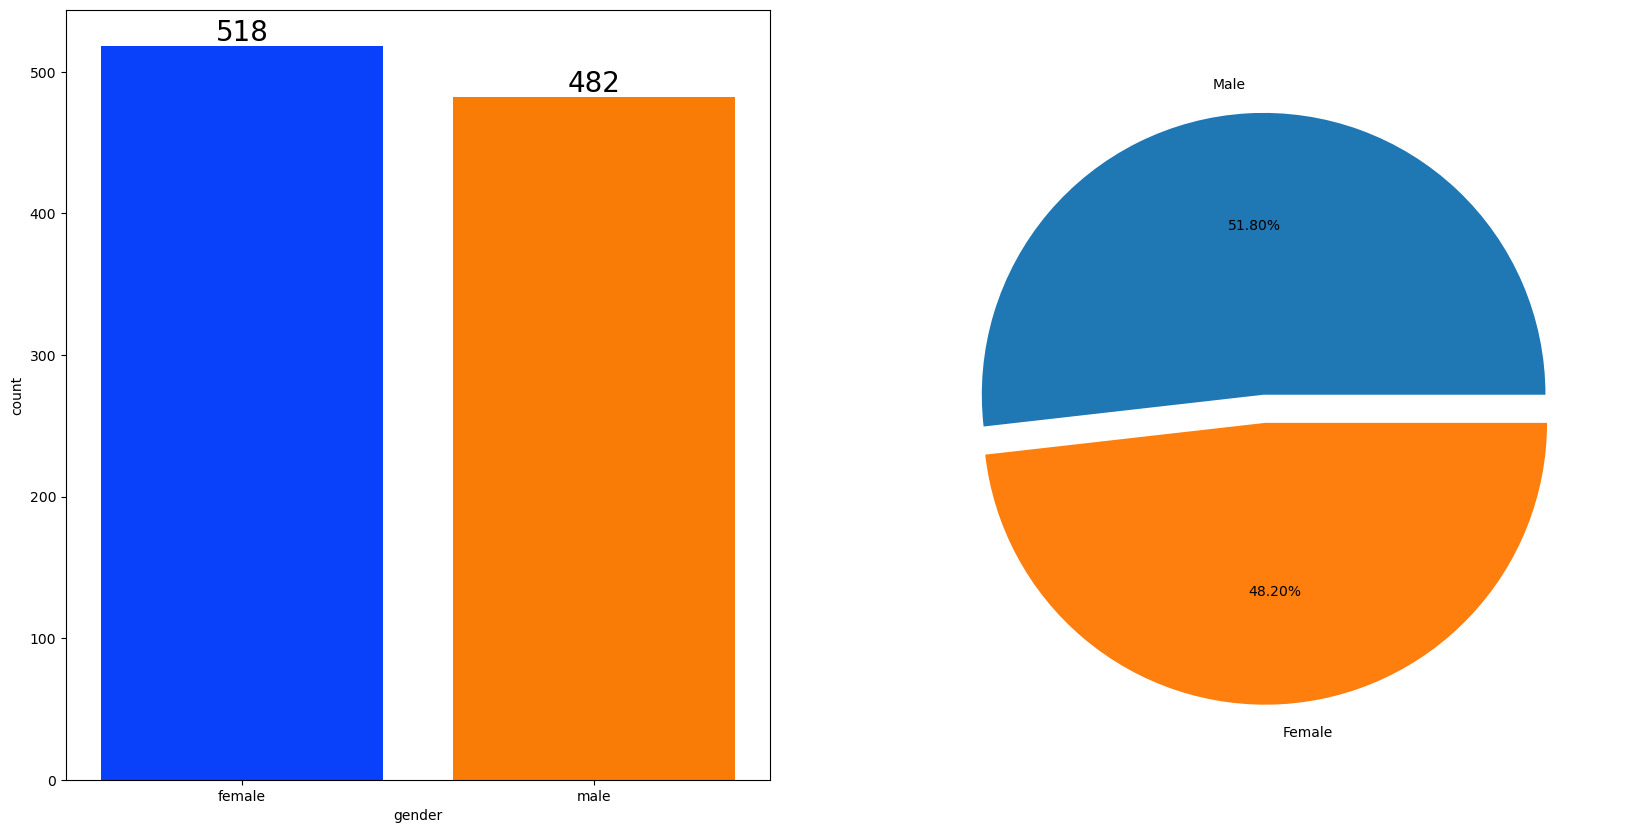

In [17]:
f, ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.2f%%')
plt.show()

* Number of female students 518 (48%) and male students 482 (52%) are nearly equal.

2. Impact of gender on Student's performance

In [18]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score'],
      dtype='object')

In [19]:
column = ['gender', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score']
gender_group = df[column].groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


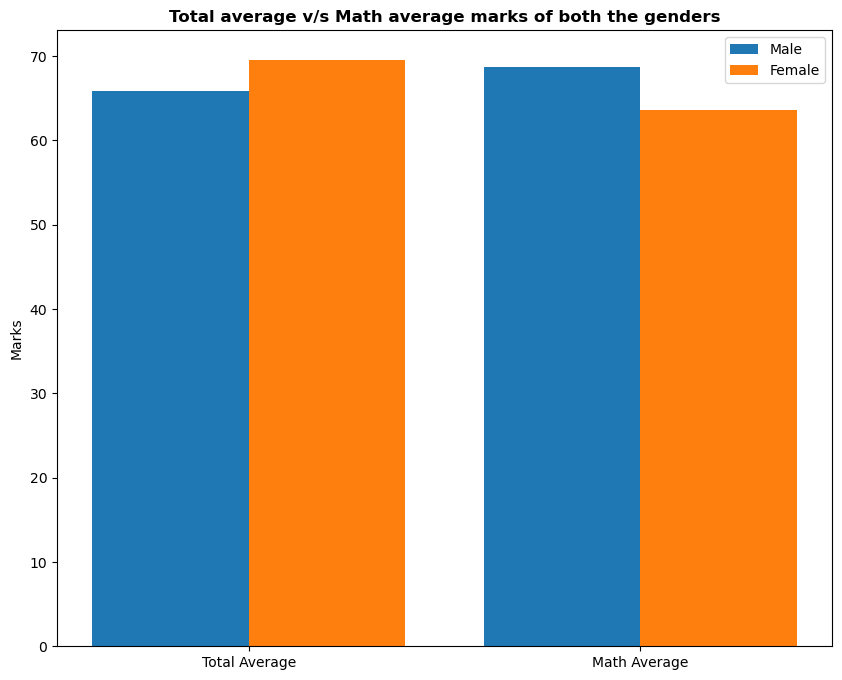

In [20]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average_score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### insights

* On an average females have a better overall score than men.* 
whereas males have scored higher in Maths.

#### Race/ethnicity column distribution

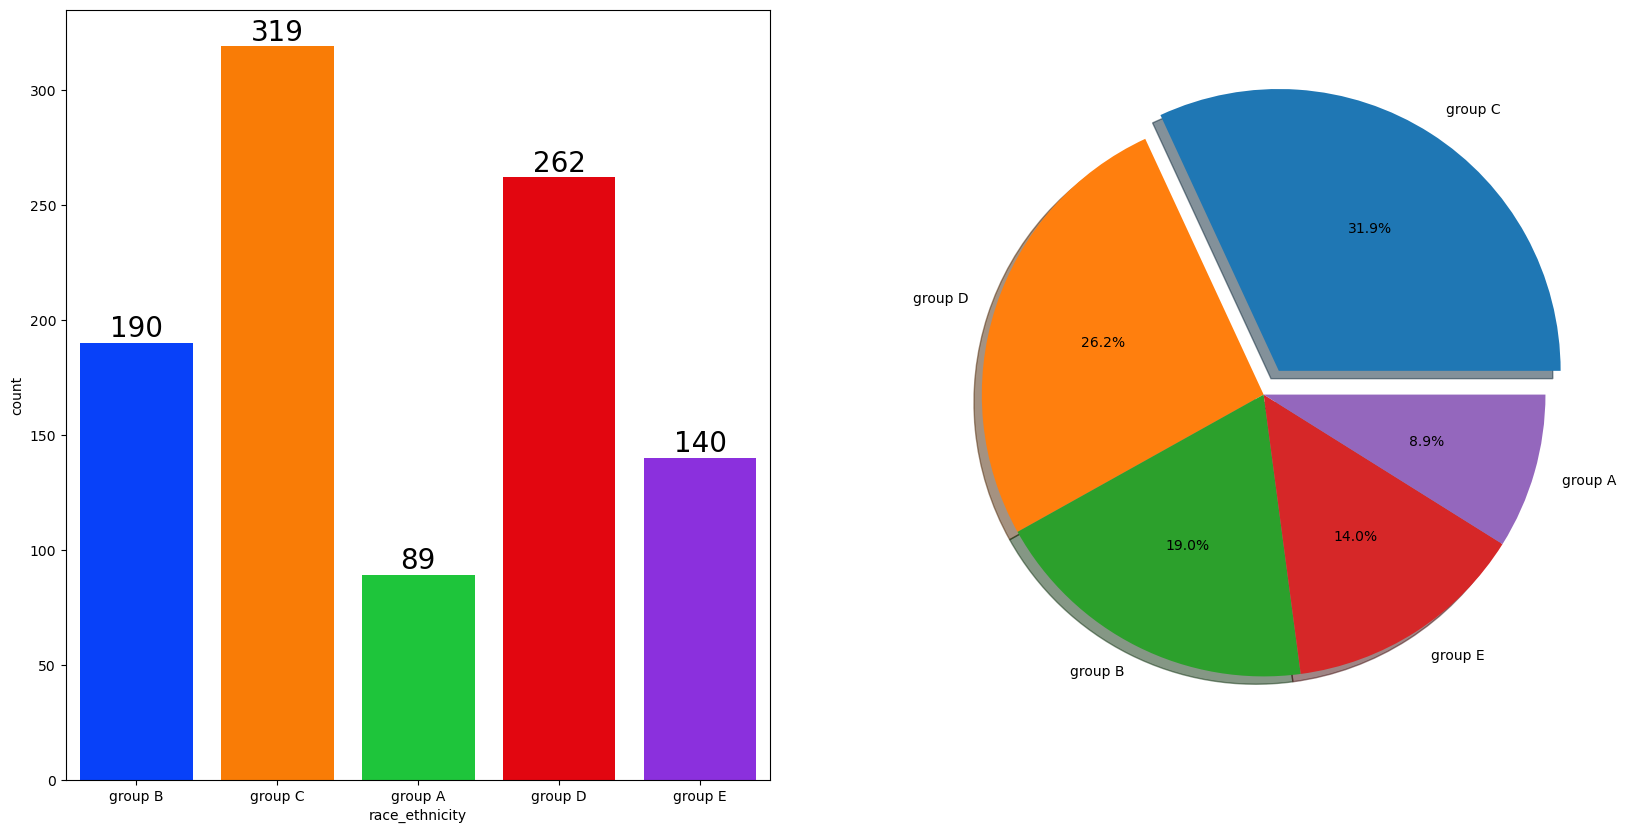

In [21]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()  

#### Insights
* Most of the student belonging from group C /group D.* 
Lowest number of students belong to groupA.

#### Impact of race/ethnicity on students performance

In [25]:
column = ['race_ethnicity', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score']
group2 = df[column].groupby('race_ethnicity').mean()
group2

,math_score,reading_score,writing_score,total_score,average_score
race_ethnicity,,,,,
group A,61.629213,64.674157,62.674157,188.977528,62.992509
group B,63.452632,67.352632,65.600000,196.405263,65.468421
group C,64.463950,69.103448,67.827586,201.394984,67.131661
group D,67.362595,70.030534,70.145038,207.538168,69.179389
group E,73.821429,73.028571,71.407143,218.257143,72.752381


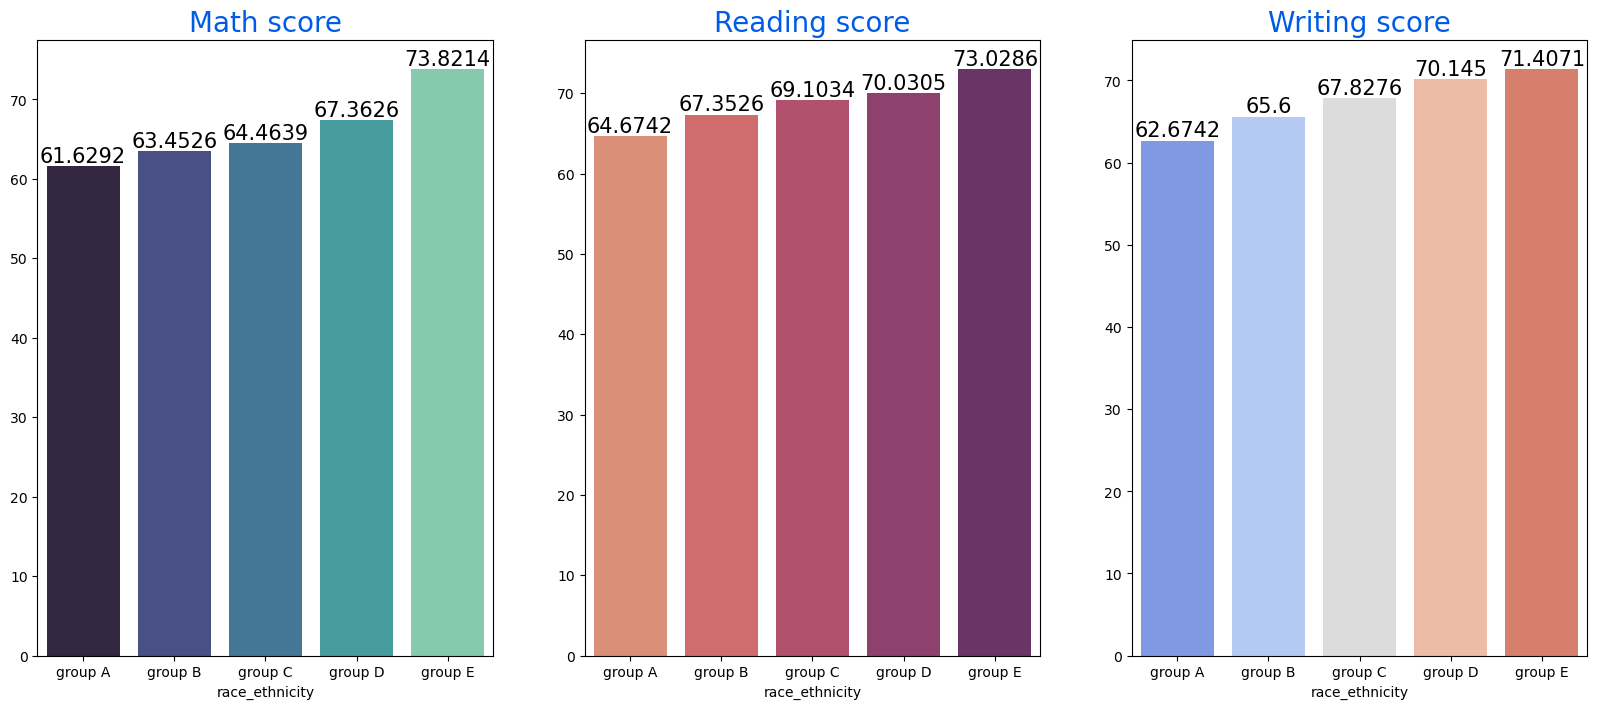

In [36]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=group2['math_score'].index,y=group2['math_score'].values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=group2['reading_score'].index,y=group2['reading_score'].values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=group2['writing_score'].index,y=group2['writing_score'].values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### insights

* Group E students have scored the highest marks.* 
Group A students have scored the lowest marks
* 
Students from a lower Socioeconomic status have a lower avg in all course subjects

#### Distribution of Parental level of education 

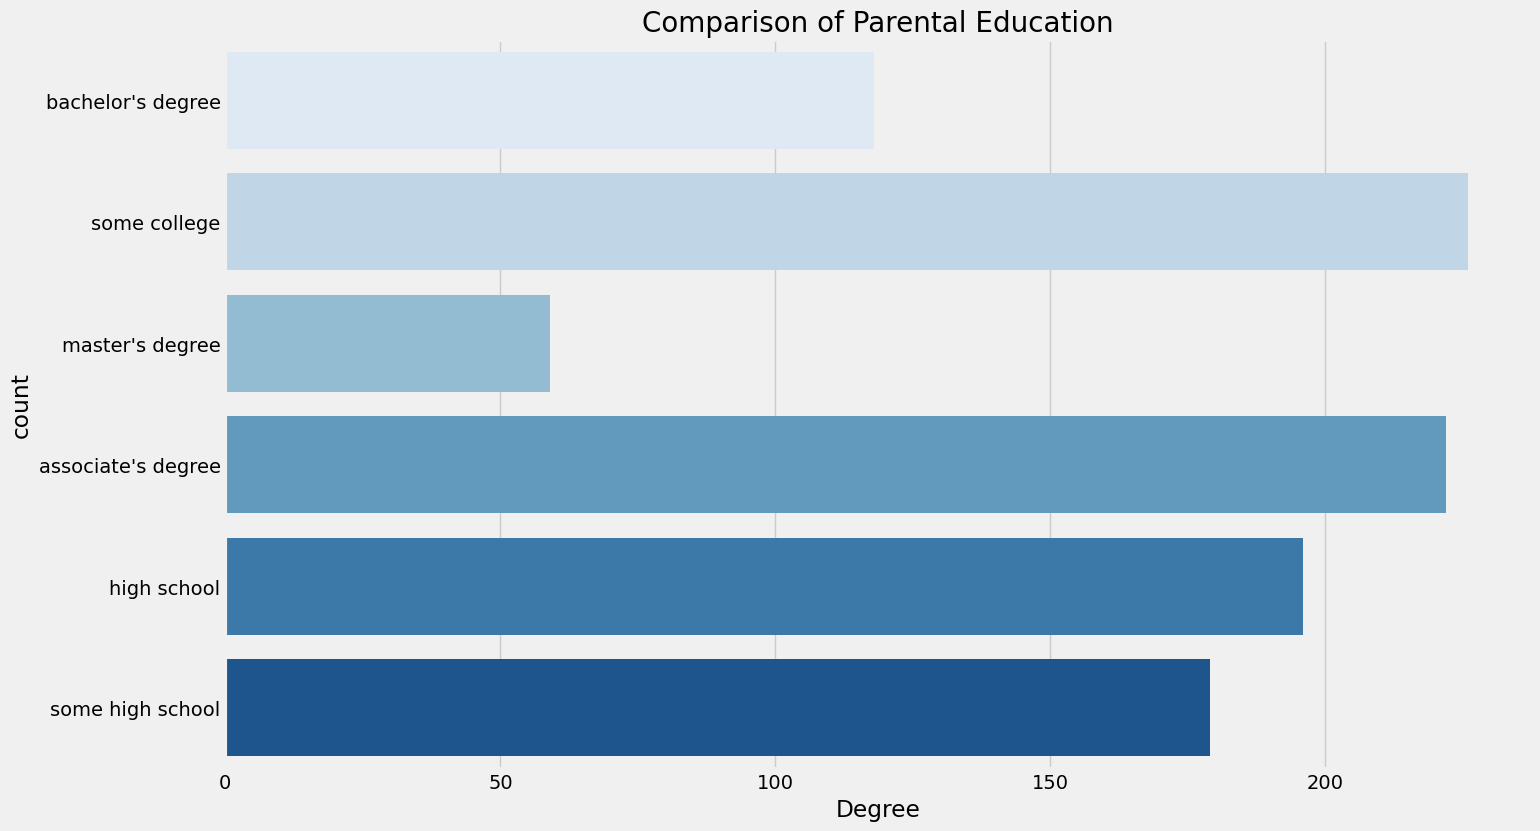

In [37]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights

* 
Largest number of parents are from some college.

### impact of parental education on students performance]

In [39]:
column = ['parental_level_of_education', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score']
group3 = df[column].groupby('parental_level_of_education').mean()
group3

,math_score,reading_score,writing_score,total_score,average_score
parental_level_of_education,,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207,69.569069
bachelor's degree,69.389831,73.000000,73.381356,215.771186,71.923729
high school,62.137755,64.704082,62.448980,189.290816,63.096939
master's degree,69.745763,75.372881,75.677966,220.796610,73.598870
some college,67.128319,69.460177,68.840708,205.429204,68.476401
some high school,63.497207,66.938547,64.888268,195.324022,65.108007


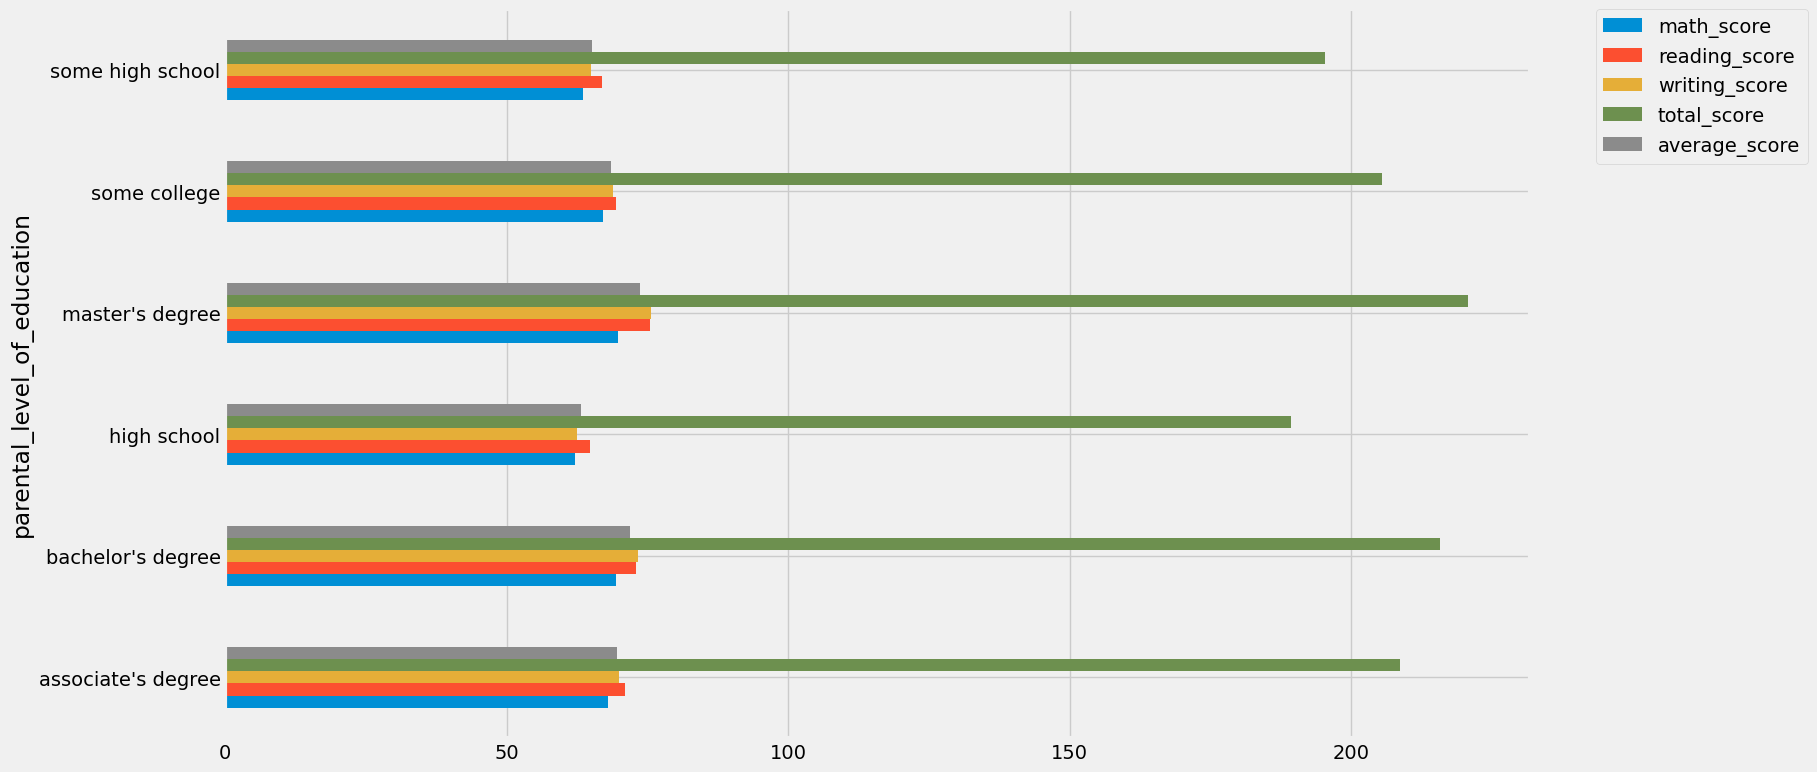

In [40]:
group3.plot(kind='barh',fig=(10,10))
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()

#### insights

* The score of student whose parents possess master and bachelor level education are higher than others.

#### Lunch column distribution

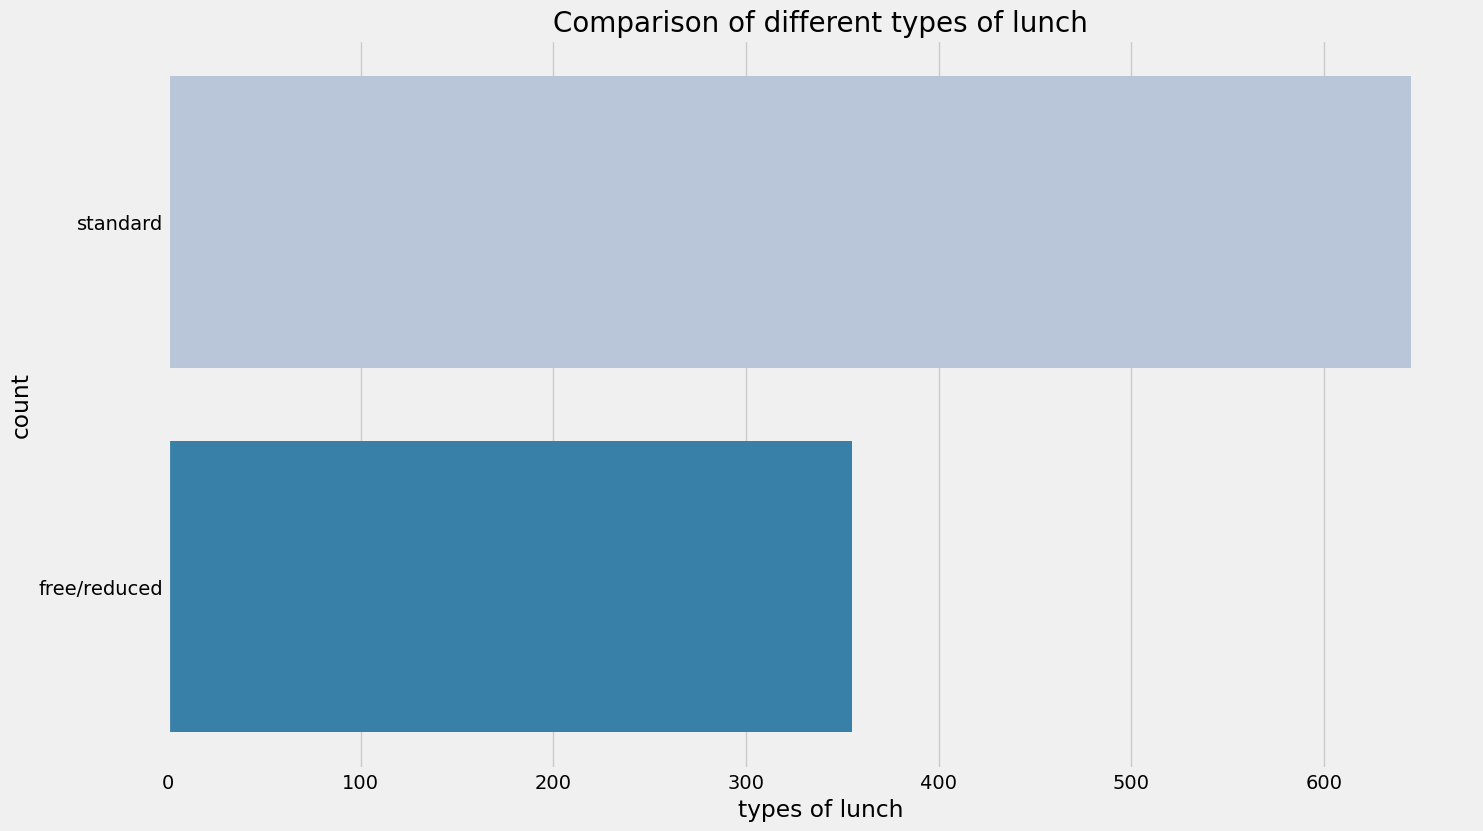

In [42]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### insights

* Students being served Standard lunch was more than free lunch

#### Impact of lunch type on student's performance

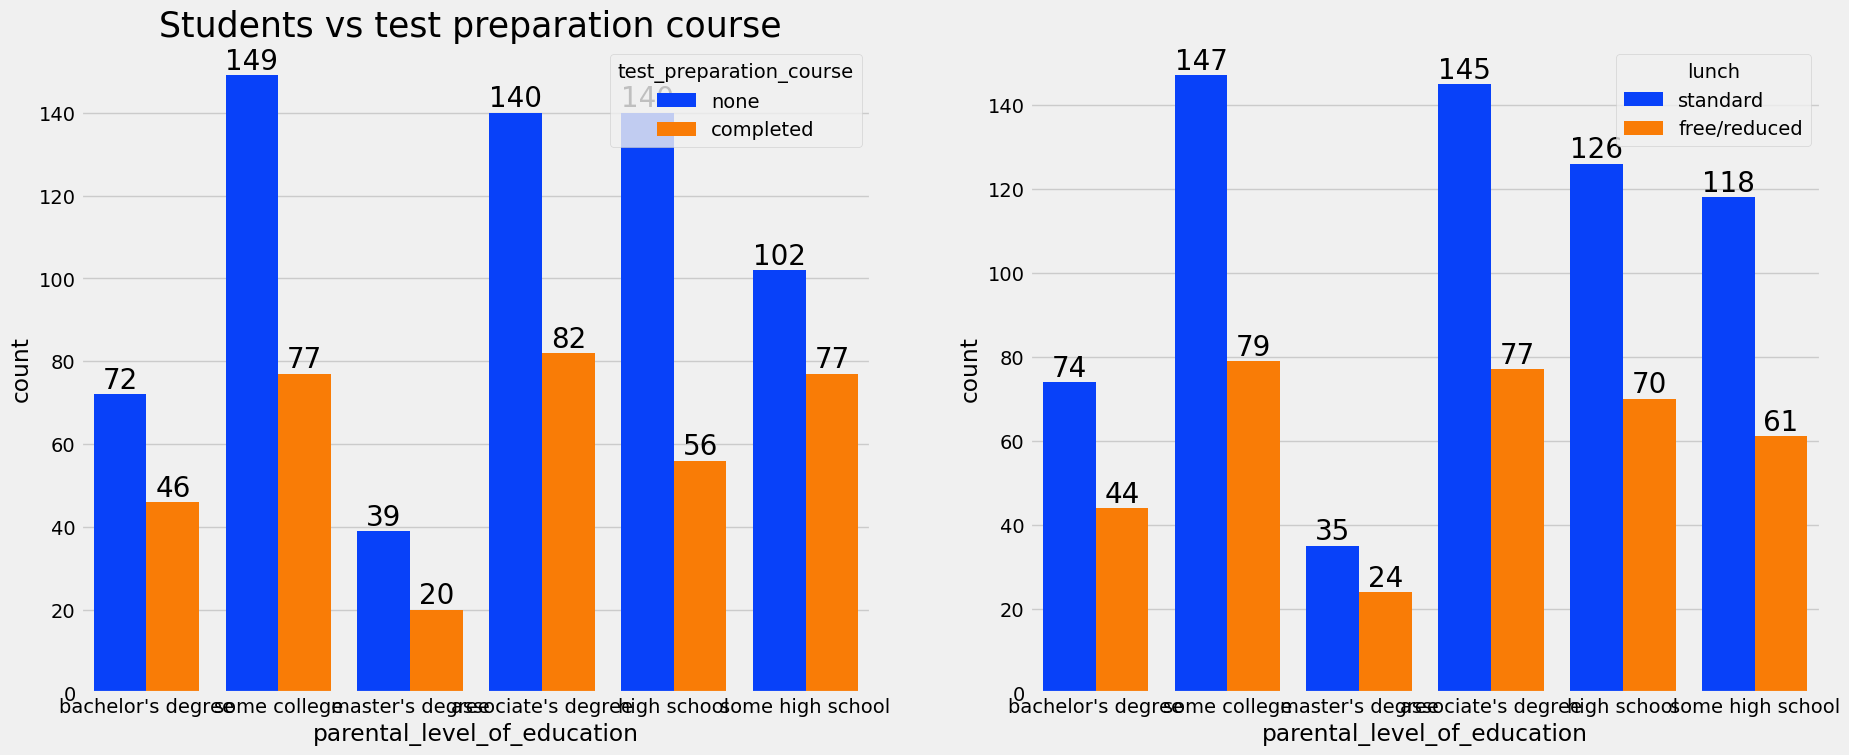

In [52]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20) 

#### insights

* Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### Impact of test preparation course on student's performance

<Axes: xlabel='lunch', ylabel='writing_score'>

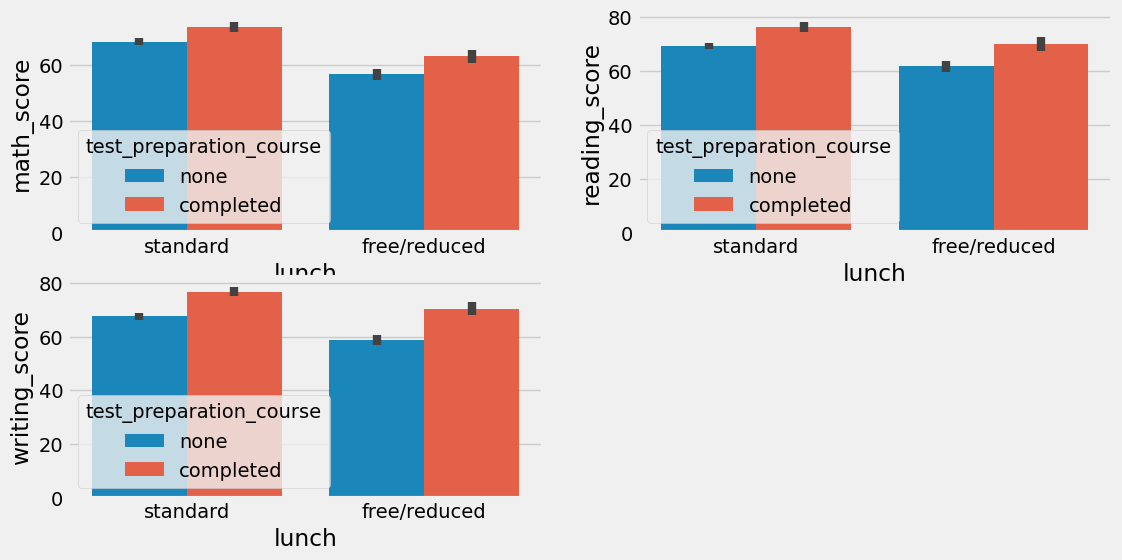

In [54]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

#### insights

* Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### Checking outliers

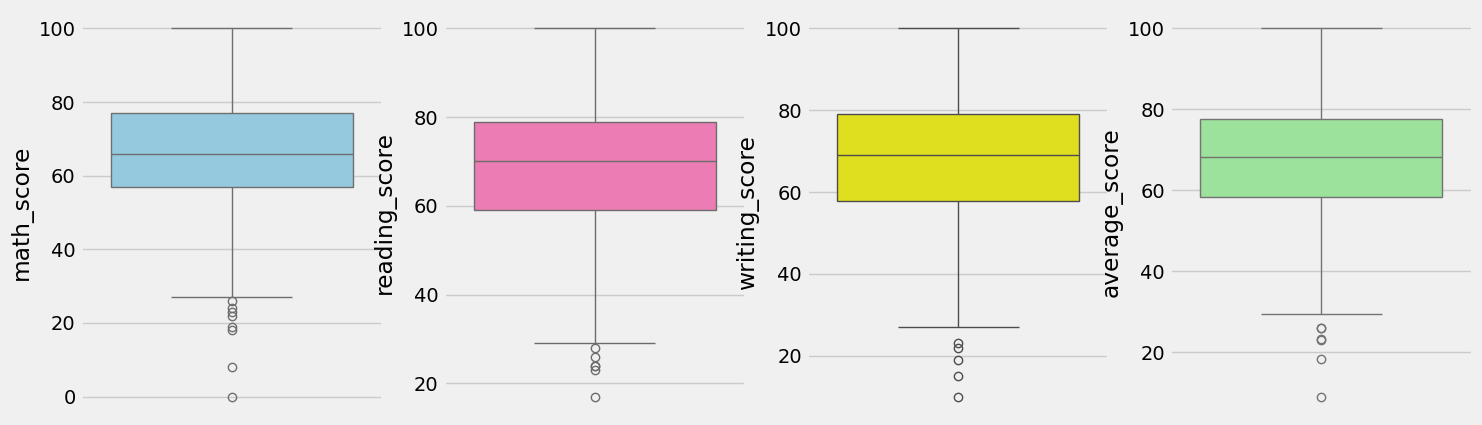

In [57]:

plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'],color='lightgreen')
plt.show()

#### Multivariate analysis using pairplot

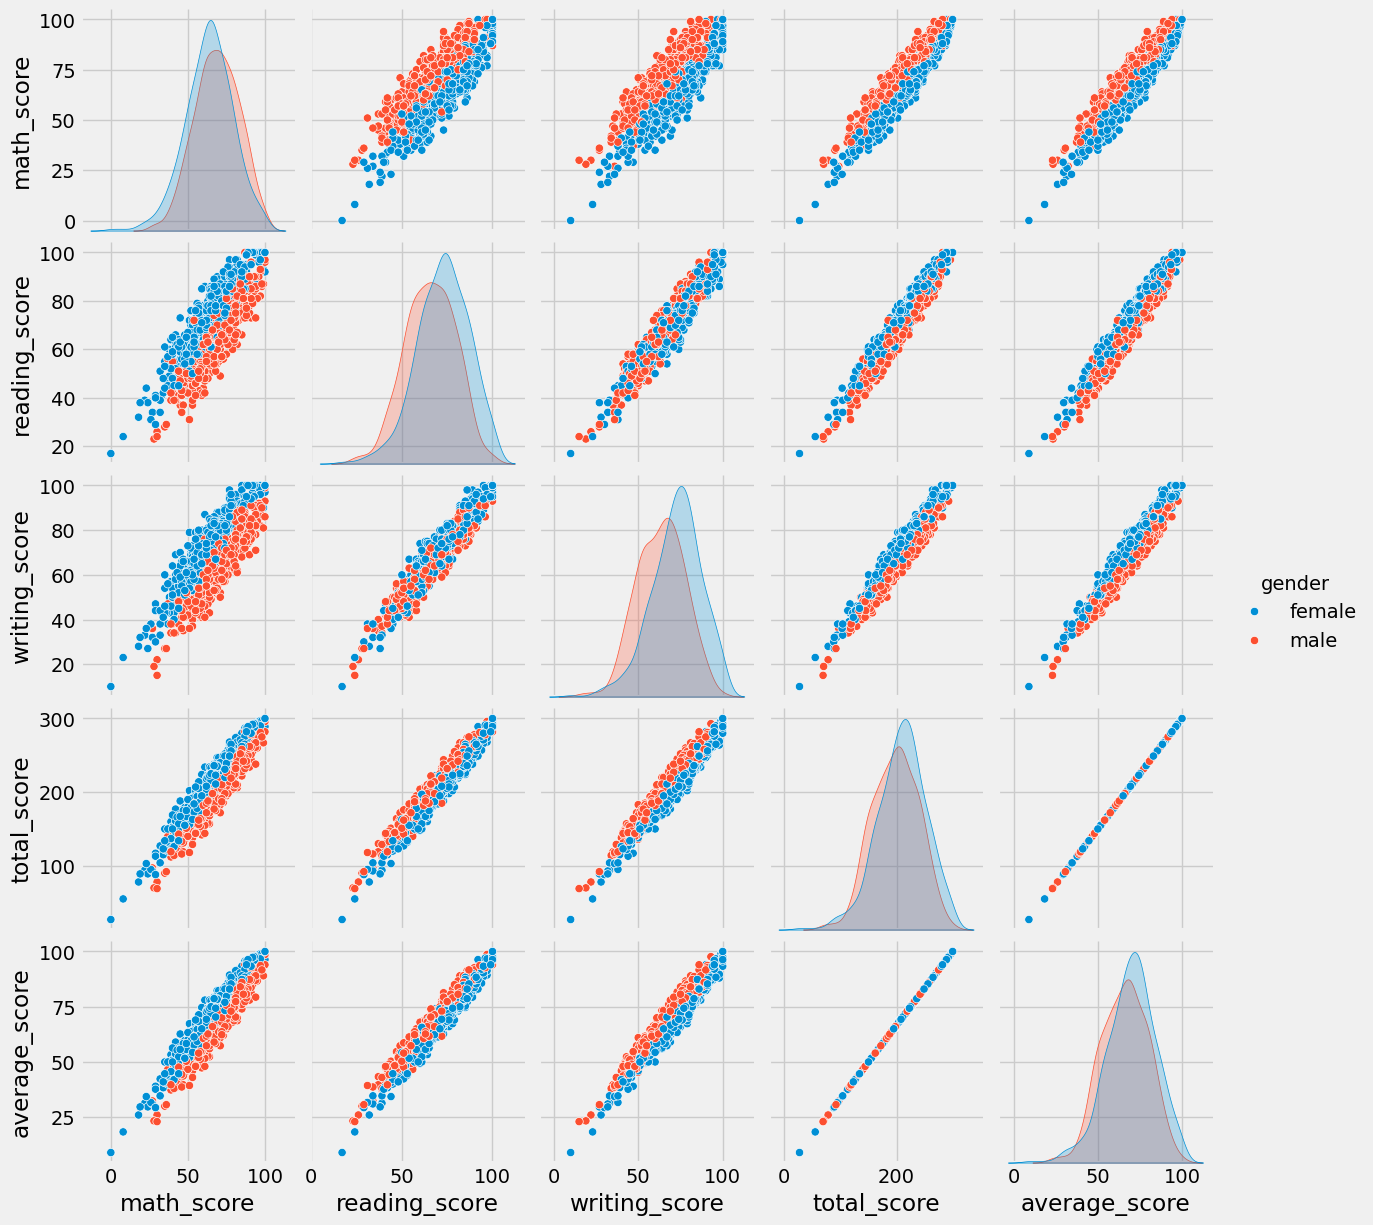

In [58]:
sns.pairplot(df,hue = 'gender')
plt.show()

From the above plot it is clear that all the scores increase linearly with each other.

#### Conclusion:
* Student's Performance is related with lunch, race, parental level education* 
Females lead in pass percentage and also are top-scorer
* Student's Performance is not much related with test preparation course
* Finishing preparation course is beneficial.